In [1]:
# Import Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Import the data and create a Pandas DataFrame
data = 'Resources/myopia.csv'
myopia_df = pd.read_csv(data)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## Prepare the Data

In [3]:
# List dataframe data types
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# Determine if there are any null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [5]:
# Determine if there are any duplicate entries
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [6]:
# Remove the "MYOPIC" column from the dataset
labels = myopia_df['MYOPIC']
myopia_df = myopia_df.drop(['MYOPIC'], axis = 1)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
# Standardize/Scale the dataset using StandardScaler() so that larger values do not influence the outcome
scaler = StandardScaler()
X_scaled = scaler.fit_transform(myopia_df)
X_scaled[0:2]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ]])

## Apply Dimensionality Reduction

### PCA: 
Peform dimensionality reduction with Principal Component Analysis

In [8]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=0.9)

# Get principal components for X_scaled
myopia_pca = pca.fit_transform(X_scaled)

In [45]:
# Transform PCA data to a DataFrame
myopia_df_pca = pd.DataFrame(data=myopia_pca)
myopia_df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [39]:
# Fetch the explained variance
pca.explained_variance_ratio_
print(f'Explained Variance: {pca.explained_variance_ratio_}')
print(f'Explained Variance Total: {pca.explained_variance_ratio_.sum()}')

Explained Variance: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]
Explained Variance Total: 0.9187361702915189


### t-SNE: 
Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [12]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_df_pca)

In [13]:
# Check how many columns the dataset now has
tsne_features.shape

(618, 2)

In [14]:
# Check label counts
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

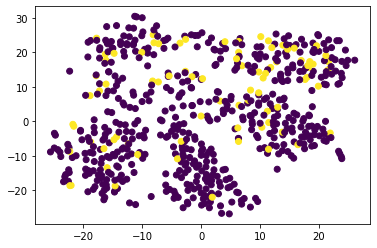

In [15]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

There are no obvious clusters after performing t-SNE to reduce the number of dimensions in our dataset.

### K-Means
Using K-means, perform an analysis to identify clusters

In [16]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


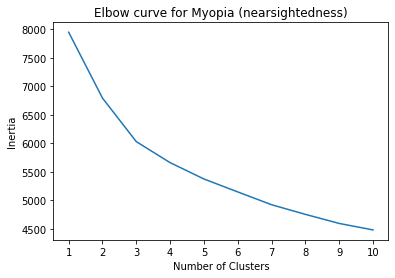

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia (nearsightedness)')
plt.show()

Based on the inflection point in the above elbow curve, this dataset should have 3 clusters. We can visualize these clusters using Matplotlib below.

In [41]:
# Add a class column to the myopia_pca DataFrame for the K-Means model
myopia_k_df = pd.DataFrame(data=myopia_pca)
myopia_k_df['class']= km.labels_
myopia_k_df.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


In [43]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(myopia_k_df)

# Predict clusters
predictions = model.predict(myopia_k_df)

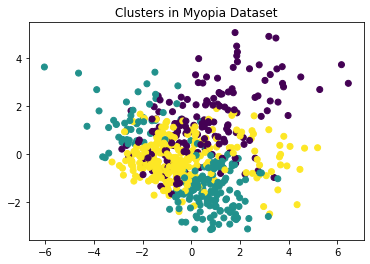

In [47]:
# Update Labels based on the model
myopia_k_df['class']= model.labels_

# Plot the clusters using a scatter plot
plt.scatter(myopia_k_df[0], myopia_k_df[1], c=myopia_k_df['class'])
plt.title('Clusters in Myopia Dataset')
plt.show()

## Recommendation
After preparing/cleaning the dataset, applying dimensionality reduction, and using K-means to perform a cluster analysis, it appears myopia patients can be grouped into 3 clusters. With these 3 clusters, I recommend apply supervised learning algorithms, specifically classification, to each cluster individually to predict a value for myopia.

Through this exercise, I learned the importance of not stopping at t-SNE despite the value it provides in reducing the number of features in our dataset, as the t-SNE algorithm did not define any clusters. Going the step further to apply a K-means clustering analysis allowed me to visualize the ideal number of clusters through an elbow curve then train the dataset based on the key number of clusters, and finally visualize those clusters. 
